<a href="https://colab.research.google.com/github/LEESUAJE1978/deeplearning_sejong/blob/master/ex03_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#0. 텐서플로우 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 1.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


1. 데이터 생성

In [2]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

2. 모델에 학습 데이터를 놓어 주기 위한 플레이스 홀더(Place holder 생성)

In [3]:
X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

3. 학습을 통해 구할 변수(W,b) 지정


In [4]:
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

4. 가설 생성

In [5]:
# Our hypothesis XW+b
hypothesis = X * W + b

4. 비용함수(Cost Function) MSE

In [6]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

5. 경사하강법(Gradient Decent) 비용함수 최적화(Cost Function Optimizer)

In [7]:
# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

6. 세션 실행(Session)

6.1 컨텍스트 매니저(Context Manager)

In [8]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("H(10) 시험성적:", sess.run(hypothesis, feed_dict= {X:[12]}))

0 Cost: 3516.6353 	W :  [6.849651] 	b: [1.671886]
20 Cost: 1.4328833 	W :  [10.472674] 	b: [2.1310732]
40 Cost: 1.3762643 	W :  [10.489321] 	b: [2.0263293]
60 Cost: 1.3282359 	W :  [10.504652] 	b: [1.9298621]
80 Cost: 1.2875022 	W :  [10.518772] 	b: [1.841018]
100 Cost: 1.2529466 	W :  [10.531775] 	b: [1.7591943]
120 Cost: 1.2236377 	W :  [10.543752] 	b: [1.6838363]
140 Cost: 1.1987841 	W :  [10.554782] 	b: [1.6144338]
160 Cost: 1.177697 	W :  [10.56494] 	b: [1.5505154]
180 Cost: 1.15981 	W :  [10.574296] 	b: [1.4916478]
200 Cost: 1.1446385 	W :  [10.5829115] 	b: [1.4374319]
220 Cost: 1.1317754 	W :  [10.590848] 	b: [1.3875004]
240 Cost: 1.1208577 	W :  [10.598156] 	b: [1.3415146]
260 Cost: 1.1116009 	W :  [10.604886] 	b: [1.2991623]
280 Cost: 1.1037498 	W :  [10.611086] 	b: [1.2601571]
300 Cost: 1.0970883 	W :  [10.616795] 	b: [1.224234]
320 Cost: 1.0914391 	W :  [10.622052] 	b: [1.1911497]
340 Cost: 1.0866505 	W :  [10.626895] 	b: [1.1606798]
360 Cost: 1.0825887 	W :  [10.631355] 	b:

6.2. close() 매서드

In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
  cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                              feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
  if step % 20 == 0:
    print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)


0 Cost: 4056.8098 	W :  [6.4844623] 	b: [2.2480884]
20 Cost: 1.8224572 	W :  [10.382131] 	b: [2.7008052]
40 Cost: 1.706692 	W :  [10.405931] 	b: [2.55104]
60 Cost: 1.6085068 	W :  [10.427852] 	b: [2.4131095]
80 Cost: 1.5252266 	W :  [10.448041] 	b: [2.2860782]
100 Cost: 1.4545928 	W :  [10.466634] 	b: [2.1690853]
120 Cost: 1.3946707 	W :  [10.483758] 	b: [2.0613372]
140 Cost: 1.3438517 	W :  [10.499529] 	b: [1.9621036]
160 Cost: 1.3007424 	W :  [10.514052] 	b: [1.8707118]
180 Cost: 1.2641807 	W :  [10.52743] 	b: [1.786542]
200 Cost: 1.2331649 	W :  [10.539749] 	b: [1.7090237]
220 Cost: 1.2068646 	W :  [10.551096] 	b: [1.6376302]
240 Cost: 1.1845484 	W :  [10.561544] 	b: [1.5718788]
260 Cost: 1.1656265 	W :  [10.571169] 	b: [1.5113236]
280 Cost: 1.14957 	W :  [10.580032] 	b: [1.455553]
300 Cost: 1.1359528 	W :  [10.588195] 	b: [1.4041895]
320 Cost: 1.1244084 	W :  [10.595713] 	b: [1.356885]
340 Cost: 1.1146102 	W :  [10.602637] 	b: [1.3133179]
360 Cost: 1.1063005 	W :  [10.609014] 	b: [

7. 예측(Prediction)

In [11]:
print("H(10) 시험성적:", sess.run(hypothesis, feed_dict= {X:[20]}))

H(10) 시험성적: [214.47102]


8.전체 코드

In [ ]:
x_train=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y_train=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

X = tf.placeholder(tf.float32, shape = None)
Y = tf.placeholder(tf.float32, shape=None)

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))  #reduce_mean:모수로 나눠주는 작업, square : 제곱을 해주는 작업

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost)

with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
      cost_val, W_val, b_val,train_val = sess.run([cost, W, b, train],
                                                  feed_dict = {
                                                      X: x_train,
                                                      Y: y_train
                                                  })
      if step % 20 == 0:
        print(step, "Cost:", cost_val, "\tW : ", W_val, "\tb:", b_val)
   
    print("H(10) 시험성적:", sess.run(hypothesis, feed_dict= {X:[3]}))

Keras

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트
import numpy as np # Numpy를 임포트

In [ ]:
#X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
#y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

X = [1, 2, 3]
y = [1, 2, 3]
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Train on 3 samples
Epoch 1/300
3/3 [==============================] - 0s 10ms/sample - loss: 2.9664 - mean_squared_error: 2.9664
Epoch 2/300
3/3 [==============================] - 0s 2ms/sample - loss: 1.4421 - mean_squared_error: 1.4421
Epoch 3/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.7042 - mean_squared_error: 0.7042
Epoch 4/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.3472 - mean_squared_error: 0.3472
Epoch 5/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.1746 - mean_squared_error: 0.1746
Epoch 6/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.0913 - mean_squared_error: 0.0913  
Epoch 7/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 8/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 9/300
3/3 [==============================] - 0s 2ms/sample - loss: 0.0224 - mean_squared_error: 0.02

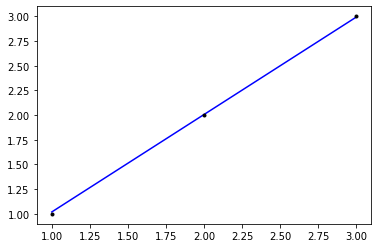

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

In [ ]:
print(model.predict([9.5]))

[[9.396553]]


파이썬 회귀분석

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y_train=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

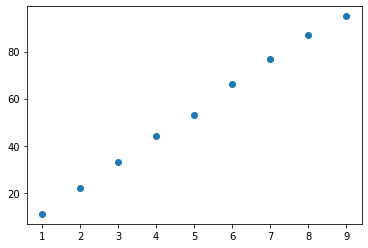

In [ ]:
plt.plot(x_train, y_train,'o')
plt.show()

In [ ]:
line_fitter = LinearRegression()


In [ ]:
line_fitter.predict([[8]])

NotFittedError: ignored